<a href="https://colab.research.google.com/github/Intelligence-Engineering-LAB-KU/Deeplearning-Tutorial/blob/master/Tutorial%201)%20CIFAR10_Softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 라이브러리 로드

필요한 라이브러리를 로드해줍니다.

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import numpy as np
import matplotlib.pyplot as plt


Using TensorFlow backend.


## 2. 데이터셋 로드

우리는 [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) 데이터를 사용할 예정입니다. 

아래와 같이 CIFAR-10 데이터를 다운받아 로드해줍니다.

training 데이터셋인 (x_train, y_train)과 test 데이터 셋인 x_test, y_test가 로드되었습니다.

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2.1 CIFAR-10 데이터셋 알아보기

먼저, 로드된 데이터 셋을 살펴보겠습니다. 



In [3]:
print(x_train.shape[0], 'train samples')
print(y_train.shape[0], 'train labels')
print(x_test.shape[0], 'test samples')
print(y_test.shape[0], 'test labels')

50000 train samples
50000 train labels
10000 test samples
10000 test labels


0번째 트레이닝 데이터와 레이블은 어떻게 생겼을까요?

In [4]:
print('0번째 이미지 데이터:', x_train[0].shape)
print('0번째 데이터 레이블:', y_train[0].shape)


0번째 이미지 데이터: (32, 32, 3)
0번째 데이터 레이블: (1,)


보시는 바와 같이, 0번째 이미지 데이터는 32 by 32 픽셀이며, 

각각의 픽셀은 RGB 3개의 채널로 이루어져있습니다. 그에 해당하는 레이블은 1차원 데이터입니다.

이번에는 이미지를 그려보겠습니다.

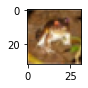

label:  [6]


In [5]:
plt.figure(figsize=(1,1))
plt.imshow(x_train[0].astype('uint8'))
plt.show()

print('label: ', y_train[0])

개구리 이미지였습니다. 그렇다면 레이블인 6은 무엇을 의미할까요?

사실 CIFAR-10 데이터 셋에는 10가지 클래스의 이미지들이 담겨있습니다. 

클래스들은 순서대로 다음과 같습니다.

```python
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
```

0번 인덱스 이미지는 6번 클래스, 즉 개구리라는 뜻이었습니다.  

이번에는 각 클래스당 5개정도 씩 이미지를 그려보겠습니다.

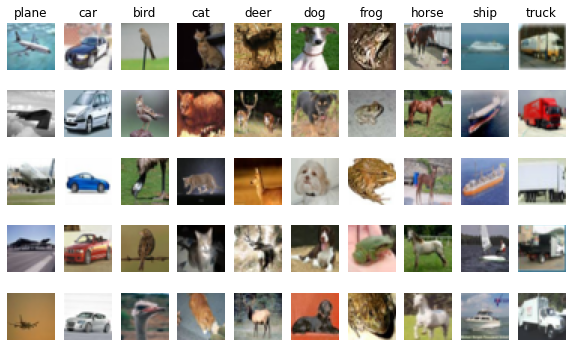

In [6]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 5

plt.figure(figsize=(10,6))
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

위와 같은 데이터가 트레이닝 셋에 5만개, 테스트 셋에만개가 주어져있는 CIFAR-10 데이터 였습니다.

### 2.2 클래스 이진화

y_train[0] 은 6이었지만, 머신러닝 모델이 0에서 9까지 이르는 이산적 값을 직접 예측하게 하는 것은 성능이 떨어집니다. 

그러한 방법 대신 10개의 클래스마다 0과 1 사이의 값을 가지게하는 이진 벡터 방식을 더 자주 사용합니다. 

예를 들어 y_train[0]은 6이므로

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0] 과 같은 이진 코드로 나타냅니다. 

Keras에서는 이를 자동화해주는 API를 제공합니다.

In [7]:
# Convert class vectors to binary class matrices.
print('y_train shape (이진화 전)', y_train.shape)
print('y_train[0]:', y_train[0])

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('y_train shape (이진화 후)', y_train.shape)
print('y_train[0]:', y_train[0])

y_train shape (이진화 전) (50000, 1)
y_train[0]: [6]
y_train shape (이진화 후) (50000, 10)
y_train[0]: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## 3. 모델 생성

이제 본격적으로 모델을 생성해보고, CIFAR-10 데이터 셋에 대해 훈련시켜보겠습니다. 

In [8]:
model = Sequential()
model.add(Flatten())
model.add(Dense(100, input_shape=(32*32*3,)))
model.add(Activation('relu'))
model.add(Dense(10, input_shape=(32*32*3,)))
model.add(Activation('softmax'))

## 4. 모델 학습

이제 모델을 학습시켜보겠습니다.

In [9]:
opt = keras.optimizers.Adam()

# 모델 생성
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('Not using data augmentation.')
model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          validation_data=(x_test, y_test),
          shuffle=True)

Not using data augmentation.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 10s 199us/step - loss: 1.8868 - accuracy: 0.3214 - val_loss: 1.7873 - val_accuracy: 0.3645
Epoch 2/10
50000/50000 [==============================] - 10s 195us/step - loss: 1.7594 - accuracy: 0.3705 - val_loss: 1.7304 - val_accuracy: 0.3714
Epoch 3/10
50000/50000 [==============================] - 10s 193us/step - loss: 1.7094 - accuracy: 0.3888 - val_loss: 1.7117 - val_accuracy: 0.3929
Epoch 4/10
50000/50000 [==============================] - 10s 192us/step - loss: 1.6862 - accuracy: 0.3994 - val_loss: 1.6683 - val_accuracy: 0.3936
Epoch 5/10
50000/50000 [==============================] - 10s 195us/step - loss: 1.6656 - accuracy: 0.4050 - val_loss: 1.6570 - val_accuracy: 0.4026
Epoch 6/10
50000/50000 [==============================] - 10s 192us/step - loss: 1.6481 - accuracy: 0.4101 - val_loss: 1.6582 - val_accuracy: 0.4084
Epoch 7/10
50000/50000 [===

## 5. 모델 성능 테스트

모델의 성능을 테스트해보겠습니다.

In [10]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 53us/step
Test loss: 1.647185499572754
Test accuracy: 0.4106000065803528


정확도가 40% 정도되는 간단한 모델을 만들어보았습니다.

## Reference

- [cs231n](http://cs231n.github.io/)
- [Keras tutorial on CIFAR-10](https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py)